# Convolutional Neural Networks

## Preliminaries

In this practical session you will implement and train several Convolutional Neural Networks (CNNs) using the Keras framework with a Tensorflow backend. If you are not already familiar with Keras, you can go over the [following tutorial](https://github.com/tueimage/essential-skills/blob/master/keras.md). More detailed information on the different functionalities can be found in the [Keras library documentation](https://keras.io/). 

Note that for this set of exercise CPU-only Tensorflow, which you should already have installed, is sufficient (i.e. GPU-support is not required but it will make your experiments run faster). 

You are also required to use the `gryds` package for data augmentation that you can install directly from git: `pip install git+https://github.com/tueimage/gryds/`.

You also have to install the Keras deep learning framework (if you have not done so already) by running `conda install keras`. Note that there are two implementations of Keras, one from https://keras.io/ and another one that ships with Tensorflow. Here we use the former. 

## MNIST
We will first train a simple CNN to classify handwritten digits using the MNIST dataset. This dataset is often referred to as the "Hello world!" example of deep learning because it can be used to quickly illustrate a small neural network in action (and obtain a decent classification accuracy in the process). More information on it can be found [here](http://yann.lecun.com/exdb/mnist/).

First, let's load the dataset and visualize some images.

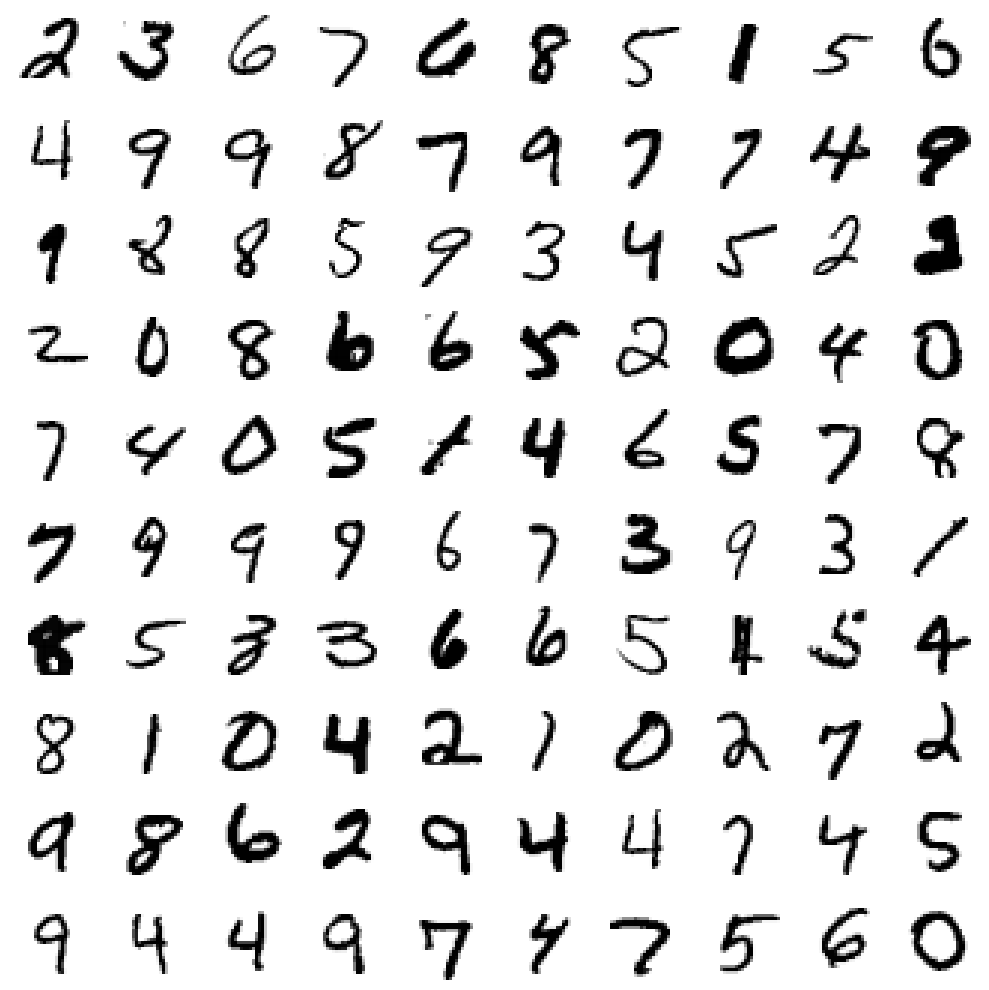

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

# load the MNIST the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale the image intensities to the 0-1 range
x_train = (x_train / 255.0).astype(np.float32)
x_test = (x_test / 255.0).astype(np.float32)

# convert the data to channel-last
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# convert the labels to one-hot encoded
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

def plot_images(images, dim=(10, 10), figsize=(10, 10), title=''):
    
    plt.figure(figsize=figsize)
    
    for i in range(images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    
    plt.tight_layout()
    plt.suptitle(title)
    plt.show()
    
plot_images(x_train[np.random.randint(0, x_train.shape[0], size=100)].reshape(100, 28, 28))

The MNIST classification task is quite simple: given an image, predict the digit that it contains. Thus, this is a 10-class classification problem.

Let's define a simple network for the handwritten digit classification.

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

C:\Users\20203129\AppData\Local\anaconda3\envs\Machinelearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Compile and train the network (note that this could take a while).

In [3]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 95ms/step - accuracy: 0.8490 - loss: 0.4751 - val_accuracy: 0.9837 - val_loss: 0.0492
Test loss: 0.04921453446149826
Test accuracy: 0.9836999773979187


Now that the model is trained, we can evaluate its performance on the independent test dataset.

In [4]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04921453446149826
Test accuracy: 0.9836999773979187


## U-Net
The U-Net convolutional neural network architecture was first developed for biomedical image segmentation and is to this day one of the most widely used methods for image segmentation. The details of the architecture can be found in the [original paper](https://arxiv.org/abs/1505.04597). In this practical we will build and train a U-Net network that is able to segment blood vessels in retinal images. 

### Loading and visualizing the data
The data for this task is taken from the [DRIVE](https://www.isi.uu.nl/Research/Databases/DRIVE/index.php) database. It consists of photographs of the retina, where the goal is to segment the blood vessels within. The dataset has a total of 40 photographs, divided in 20 images for training and 20 for testing. The images corresponding to the DRIVE test set can be found [here](https://www.dropbox.com/s/zk51wgupimw7jd9/DRIVE.zip?dl=0).

Let's load the training set and visualize an image with the corresponding blood vessel segmentation. For training we will divide the data in a training and a validation set to monitor the model during training.

(20, 584, 565, 3)


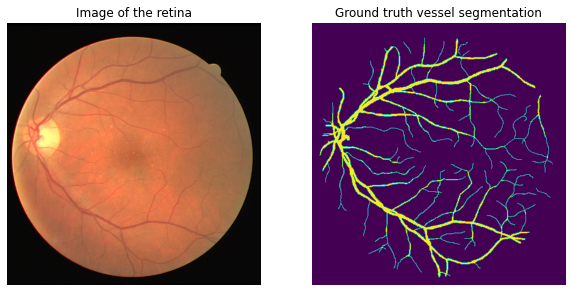

(16, 584, 565, 3)
(16, 584, 565, 1)
(16, 584, 565, 1)
(4, 584, 565, 3)
(4, 584, 565, 1)
(4, 584, 565, 1)


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from glob import glob
from unet_utils import load_data

# location of the DRIVE dataset
data_folder = './DRIVE/'
train_paths = glob(data_folder + 'training/images/*.tif')
images, masks, segmentations = load_data(train_paths)

# print the shape of image dataset
print(images.shape)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(images[0])

plt.subplot(1, 2, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(segmentations[0][:, :, 0])

plt.show()

# divide in training and validation
train_images, val_images, train_masks, val_masks, train_segmentations, val_segmentations = train_test_split(
    images, masks, segmentations, test_size=0.2, random_state=7)

# print the shape of the training and valudation datasets
print(train_images.shape)
print(train_masks.shape)
print(train_segmentations.shape)
print(val_images.shape)
print(val_masks.shape)
print(val_segmentations.shape)

### Training a U-Net model

You are already provided with implementation of the U-Net architecture in `unet_model.py`. This is a modular implementation and can be used to generate U-Net architectures with a variety of hyperparameters such as depth and number of feature maps. Before using the model, examine the code and documentation and make sure that you understand all the details.

We will train a U-Net model using smaller patches extracted from the training images. Training the images on smaller patches requires less computation power and results in a more varied training dataset (it has the effect of data augmentation by image translation). Because a U-Net is a fully convolutional network it can be evaluated on inputs of different size (the output size will change according to the input size). Thus, although the model will be trained on smaller patches it can still be used to segment larger images with one pass through the model. 


(3200, 32, 32, 3)


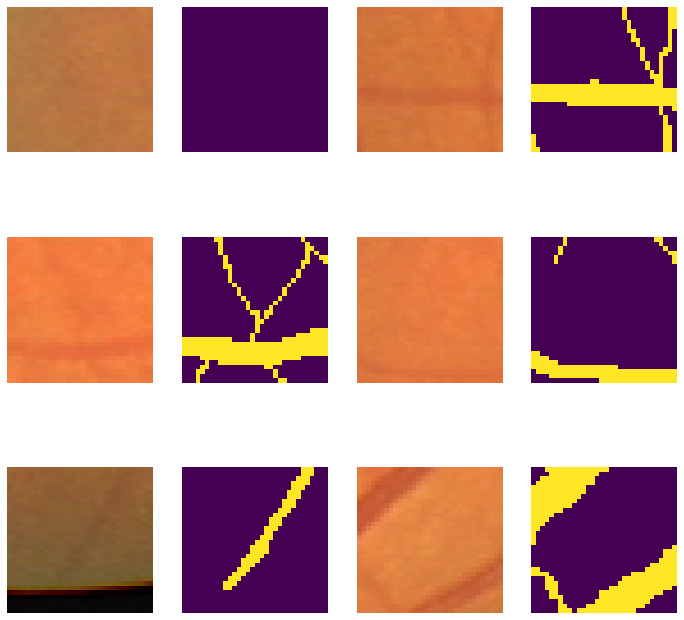

In [6]:
from unet_utils import extract_patches, preprocessing

# work with 32x32 patches
patch_size = (32, 32)

# 200 patches per image
patches_per_im = 200

# visualize a couple of patches as a visual check
patches, patches_segmentations = extract_patches(train_images, train_segmentations, patch_size, patches_per_im, seed=7)

print(patches.shape)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))

for i in range(0, 3):
    axes[i, 0].axis('off')
    axes[i, 0].imshow(patches[i])
    axes[i, 1].axis('off')
    axes[i, 1].imshow(patches_segmentations[i][:, :, 0])
    axes[i, 2].axis('off')
    axes[i, 2].imshow(patches[i+5])
    axes[i, 3].axis('off')
    axes[i, 3].imshow(patches_segmentations[i+5][:, :, 0])

plt.show()

In [7]:
# pad the validation data to fit the U-Net model
# images of shape (584, 565) shape result in concatenation error due to the odd number of columns

print("Old shape:", val_images.shape)

val_images, val_masks, val_segmentations = preprocessing(
    val_images, 
    val_masks, 
    val_segmentations, 
    desired_shape=(584, 584))
    
print("New shape:", val_images.shape)

Old shape: (4, 584, 565, 3)
New shape: (4, 584, 584, 3)


In [8]:
import os
from unet_model import unet
from unet_utils import datagenerator
from keras.models import load_model
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = np.expand_dims(train_images[0], axis=0), np.expand_dims(train_segmentations[0], axis=0)

print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 1
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
history = model.fit(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

(1, 584, 565, 3)
(1, 584, 565, 1)
50/50 - 55s - 1s/step - accuracy: 0.8261 - loss: 0.5234 - val_accuracy: 0.9211 - val_loss: 0.4219


### Visualizing the segmentation results

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


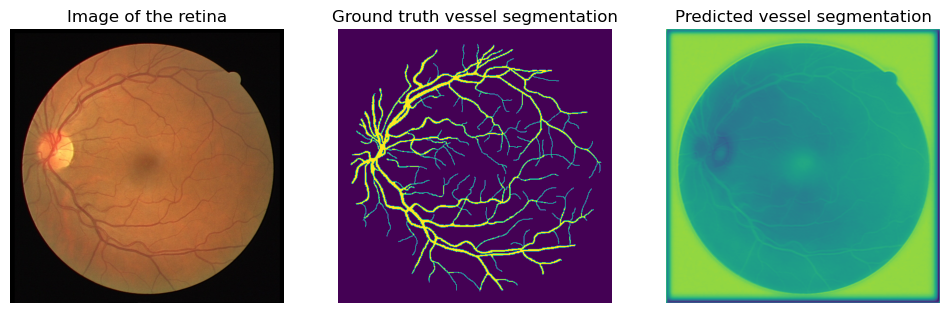

In [9]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + 'test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

# Exercises

## Number of parameters

The first convolutional layer in the MNIST example has 320 parameters. The first fully connected layer has 1179,776 parameters. What do these parameters correspond to? 

<font color='#770a0a'>What is the general expression for the number of parameters of 1) a convolutional layer and 2) a fully-connected layer?</font>

In general, the parameters in a layer are weights that are 'learned' during the training of the model. The standard formula is: ((shape of width of the filter * shape of height of the filter * number of filters in the previous layer+1) * number of filters). The 1 represents the bias term for every filter. Fully connected layers have in general the highest number of paramaters when it comes to other types of layers. The formula for the amount of parameters is: ((current layer neurons c * previous layer neurons p)+1*c). 

Source: https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d (did the calculations, they are correct)


## Fully-convolutional MNIST model

Modify the model in the MNIST example in such a way that it only contains convolutional layers while keeping the same number of parameters. If you do the modification correctly, the two models will have the same behaviour (i.e. they will represent the same model, only with different implementation). Show this experimentally. 




## U-Net architecture

<font color='#770a0a'> What is the role of the skip connections in the U-Net neural network architecture? Will it be possible to train the exact same architecture with the skip connections omitted? If yes, what would be the expected result? If no, what would be the cause of the error?</font>



## Data augmentation

<font color='#770a0a'>Why does data augmentation result in less overfitting? Can data augmentation be applied to the test samples? If yes, towards what goal? If no, what is preventing that?</font>


Implement random brightness augmentation of the image data by adding a random offset to the image intensity before passing them trough the network at training time. Train a model with random brightness augmentation and compare it to the baseline above. 

Implement data augmentation procedure that in addition to brightness augmentation also performs b-spline geometric augmentation using the [`gryds`](https://github.com/tueimage/gryds) package (you can look at the documentation of the package for an example on how to do that). Compare the new model with the baseline and the model that only performs brightness augmentation.



## Answers data augmentation 
#### Why does data augmentation result in less overfitting? 
Overfitting occurs when the model learns the patterns of the training dataset too well, including irrelevant details and noise. This makes it harder for the model to generalize to new unseen data, reducing its performance on other datasets. Data augmentation generates new variations of the existing training dataset, creating more data to learn from. The model is then trained on a greater variety of inputs to avoid learning the specific patterns of the training dataset and overfitting all the samples. Instead, the model is forced to generalize. 

#### Can data augmentation be applied to the test samples? If yes, towards what goal? If no, what is preventing that?
Data augmentation is performed only on the training set to make the model more generalize and robust. Therefore, adding to the test set is pointless. 


In [ ]:
# DEZE CODE GEBRUIKEN WE
# IK HERHAAL DEZE CODE PLS
import os
from unet_model import unet
from unet_utils import datagenerator
from keras.models import load_model
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import gryds
from week_4 import *

def random_brightness_augmentation(patch):
    """ 
    Adjust brightness by adding a random offset to the image intensity.
    
    :param patch: input image patch with values in the range [0, 1]
    """
    # Smaller random brightness offset in the range [-0.3, 0.3]
    random_brightness_offset = np.random.uniform(-0.3, 0.3, size=(1, 1, 1))
    
    # Apply brightness adjustment
    patch[..., :3] += random_brightness_offset
    
    # Clip values to stay in the range [0, 1]
    patch = np.clip(patch, 0, 1)
    
    return patch

def random_bspline(patch, seg):
    """
    Applies geometric augmentation to an image/patch. The output is an altered path and it's corresponding segmentation.
    """
    # Assuming image has the shape (584, 565, 3)
    # Define a random 3x3 B-spline grid for a 2D image:

    random_grid = np.random.rand(2, 3, 3)  # 2D grid: 2 displacement directions (x, y) for a 3x3 control points grid
    random_grid -= 0.5  # Center around zero
    random_grid /= 5    # Scale down for small displacements

    # Define a 2D B-spline transformation object using the random grid
    bspline = gryds.BSplineTransformation(random_grid)

    # List to hold transformed channels
    channels = []

    # Loop over the 3 color channels (R, G, B)
    for i in range(3):
        # Create an interpolator for the current channel (2D)
        channel_interpolator = gryds.Interpolator(patch[:, :, i])
            
        # Transform the current channel using the 2D B-spline transformation
        transformed_channel = channel_interpolator.transform(bspline)
            
        # Append the transformed channel to the list
        channels.append(transformed_channel)

    # Stack the transformed channels back together into a single image
    new_patch = np.stack(channels, axis=-1)  # Stack along the last axis (color channels)
        
    # Now, transform the segmentation (patch_segmentation) using nearest-neighbor interpolation
    segmentation_interpolator = gryds.Interpolator(seg[:, :, 0], order=0)  # Nearest-neighbor for segmentation
    new_seg = segmentation_interpolator.transform(bspline)
    return new_patch, new_seg

def alter_patch(patches, patches_segmentations, bspline=False, brightness=False, nr_copies=1):
    """
    Alters patches (and patch segmentations) a number of times (depending on nr_copies) to produce new data.
    """
    patches_og = patches
    patches_final = patches

    patches_segmentations_og = patches_segmentations
    patches_segmentations_final = patches_segmentations

    patches_brightness = patches
    patches_segmentations_brightness = patches_segmentations

    if brightness:
        for i in range(patches_brightness.shape[0]):
            patches_brightness[i, :, :, :] = random_brightness_augmentation(patches_og[i])
            patches_segmentations_brightness[i, :, :, :] = patches_segmentations_og[i]
        
        if not bspline:
            patches_final = np.concatenate((patches_brightness, patches_og), axis=0)
            patches_segmentations_final = np.concatenate((patches_segmentations_brightness, patches_segmentations_og), axis=0)
        else:
            for i in range(patches_og.shape[0]):
                for j in range(nr_copies):
                    new_patch, new_seg = random_bspline(patches_brightness[i], patches_segmentations_og[i])
                    
                    # Expanding matrix to combine with original patches and segmentations
                    new_patch_dim = np.expand_dims(new_patch, axis=0)
                    new_seg_dim = np.expand_dims(new_seg, axis=0)
                    new_seg_dim_2 = np.expand_dims(new_seg_dim, axis=-1)

                    # Clip new_patch to ensure valid RGB range
                    new_patch_dim = np.clip(new_patch_dim, 0, 1)

                    # Append the new matrix to the existing tensor
                    patches_final = np.concatenate((patches_final, new_patch_dim), axis=0)
                    patches_segmentations_final = np.concatenate((patches_segmentations_final, new_seg_dim_2), axis=0)
  
    return patches_final, patches_segmentations_final

# Create a very simple datagenerator
def datagenerator1(images, segmentations, patch_size, patches_per_im, batch_size, brightness_augmentation= False, bspline_augmentation= False):
    """
    Simple data-generator to feed patches in batches to the network.
    To extract different patches each epoch, steps_per_epoch in fit_generator should be equal to nr_batches.

    :param images: Input images
    :param segmentations: Corresponding segmentations
    :param patch_size: Desired patch size
    :param patches_per_im: Amount of patches to extract per image
    :param batch_size: Number of patches per batch
    :return: Batch of patches to feed to the model
    """
    # Total number of patches generated per epoch
    total_patches = len(images) * patches_per_im
    # Amount of batches in one epoch
    nr_batches = int(np.ceil(total_patches / batch_size))

    while True:
        # Each epoch extract different patches from the training images
        patches, patches_segmentations = extract_patches(images, segmentations, patch_size, patches_per_im, seed=7)
        new_patches, new_segmentations = alter_patch(patches, patches_segmentations, brightness = brightness_augmentation, bspline = bspline_augmentation,  nr_copies = 1)

        # Feed data in batches to the network
        for idx in range(nr_batches):
            x_batch = new_patches[idx * batch_size:(idx + 1) * batch_size]
            y_batch = new_segmentations[idx * batch_size:(idx + 1) * batch_size]
            yield x_batch, y_batch

# pad the validation data to fit the U-Net model
val_images, val_masks, val_segmentations = preprocessing(
    val_images, 
    val_masks, 
    val_segmentations, 
    desired_shape=(584, 584))

# work with 32x32 patches
patch_size = (32, 32)

# 200 patches per image
patches_per_im = 200

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 150
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)


######################### Baseline model
print('baseline model:')
# initialize model
model_baseline = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# compile the model
model_baseline.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# train the model with the data generator, and save the training history
history_baseline = model_baseline.fit(datagenerator1(train_images, train_segmentations, patch_size, patches_per_im, batch_size, brightness_augmentation= False, bspline_augmentation= False),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

######################### Model with brightness augmentation
print('brightness augmentation:')
# initialize model
model_brightness = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# compile the model
model_brightness.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# train the model with the data generator, and save the training history
history_brightness = model_brightness.fit(datagenerator1(train_images, train_segmentations, patch_size, patches_per_im, batch_size, brightness_augmentation= True, bspline_augmentation= False),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

######################### Model with brightness and  b-spline geometric augmentation
print('b-spline geometric augmentation:')
# initialize model
model_bspline = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# compile the model
model_bspline.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# train the model with the data generator, and save the training history
history_bspline = model_bspline.fit(datagenerator1(train_images, train_segmentations, patch_size, patches_per_im, batch_size, brightness_augmentation= True, bspline_augmentation= True),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

baseline model:
Epoch 1/150
 - 116s - loss: 0.5404 - accuracy: 0.8016 - val_loss: 0.4520 - val_accuracy: 0.9211
Epoch 2/150
 - 99s - loss: 0.3234 - accuracy: 0.9414 - val_loss: 0.3175 - val_accuracy: 0.9211
Epoch 3/150
 - 98s - loss: 0.2294 - accuracy: 0.9515 - val_loss: 0.2864 - val_accuracy: 0.9211
Epoch 4/150
 - 95s - loss: 0.1808 - accuracy: 0.9542 - val_loss: 0.2880 - val_accuracy: 0.9211
Epoch 5/150
 - 95s - loss: 0.1553 - accuracy: 0.9554 - val_loss: 0.3311 - val_accuracy: 0.9211
Epoch 6/150
 - 96s - loss: 0.1399 - accuracy: 0.9563 - val_loss: 0.3744 - val_accuracy: 0.9179
Epoch 7/150
 - 96s - loss: 0.1305 - accuracy: 0.9574 - val_loss: 0.3026 - val_accuracy: 0.9255
Epoch 8/150
 - 97s - loss: 0.1357 - accuracy: 0.9547 - val_loss: 0.1703 - val_accuracy: 0.9461
Epoch 9/150
 - 97s - loss: 0.1284 - accuracy: 0.9564 - val_loss: 0.1543 - val_accuracy: 0.9530
Epoch 10/150
 - 95s - loss: 0.1191 - accuracy: 0.9583 - val_loss: 0.1453 - val_accuracy: 0.9599
Epoch 11/150
 - 95s - loss: 0.11

c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)
c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 583s - loss: 0.5955 - accuracy: 0.7298 - val_loss: 0.4177 - val_accuracy: 0.9211
Epoch 2/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 366s - loss: 0.3854 - accuracy: 0.9260 - val_loss: 0.3007 - val_accuracy: 0.9211
Epoch 3/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 319s - loss: 0.2649 - accuracy: 0.9457 - val_loss: 0.2891 - val_accuracy: 0.9211
Epoch 4/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 332s - loss: 0.2042 - accuracy: 0.9499 - val_loss: 0.3039 - val_accuracy: 0.9211
Epoch 5/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 441s - loss: 0.1730 - accuracy: 0.9503 - val_loss: 0.3226 - val_accuracy: 0.9182
Epoch 6/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)
c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 648s - loss: 0.1520 - accuracy: 0.9529 - val_loss: 0.3495 - val_accuracy: 0.9155
Epoch 7/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 383s - loss: 0.1429 - accuracy: 0.9534 - val_loss: 0.2669 - val_accuracy: 0.9175
Epoch 8/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 403s - loss: 0.1301 - accuracy: 0.9562 - val_loss: 0.2898 - val_accuracy: 0.9156
Epoch 9/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 388s - loss: 0.1257 - accuracy: 0.9570 - val_loss: 0.3522 - val_accuracy: 0.9187
Epoch 10/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 356s - loss: 0.1240 - accuracy: 0.9562 - val_loss: 0.3307 - val_accuracy: 0.9429
Epoch 11/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)
c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 570s - loss: 0.1171 - accuracy: 0.9581 - val_loss: 0.1556 - val_accuracy: 0.9582
Epoch 12/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 1443s - loss: 0.1179 - accuracy: 0.9572 - val_loss: 0.1232 - val_accuracy: 0.9566
Epoch 13/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 330s - loss: 0.1104 - accuracy: 0.9601 - val_loss: 0.1126 - val_accuracy: 0.9594
Epoch 14/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 315s - loss: 0.1077 - accuracy: 0.9607 - val_loss: 0.0907 - val_accuracy: 0.9669
Epoch 15/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 316s - loss: 0.1062 - accuracy: 0.9612 - val_loss: 0.1006 - val_accuracy: 0.9650
Epoch 16/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 318s - loss: 0.1061 - accuracy: 0.9608 - val_loss: 0.1111 - val_accuracy: 0.9600
Epoch 17/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)
c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 521s - loss: 0.1017 - accuracy: 0.9618 - val_loss: 0.1074 - val_accuracy: 0.9600
Epoch 18/150


c:\Anaconda\envs\8dm50\lib\site-packages\keras\utils\data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


 - 332s - loss: 0.1004 - accuracy: 0.9617 - val_loss: 0.1595 - val_accuracy: 0.9550
Epoch 19/150
